In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Downlink - Small Packets

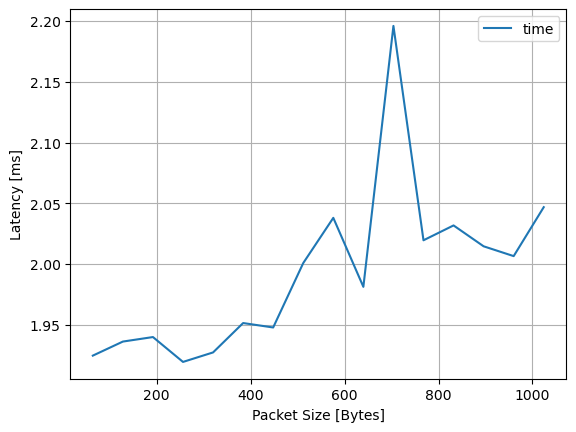

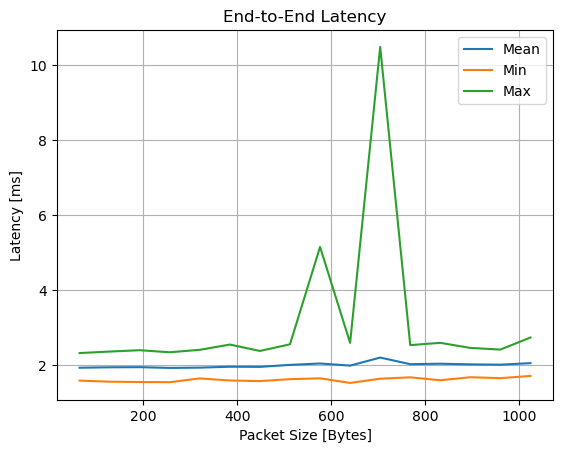

In [3]:
df = pd.read_csv("end-2-end_small.csv")
df["time"] = df["time"] * 1000
df = df.drop(["count"], axis=1)

df.groupby("size").mean().plot(legend=True)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()

dg = df.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End Latency")
plt.savefig("dl-small-packets-end-to-end-latency.png")
plt.show()

# Downlink - Large Packets

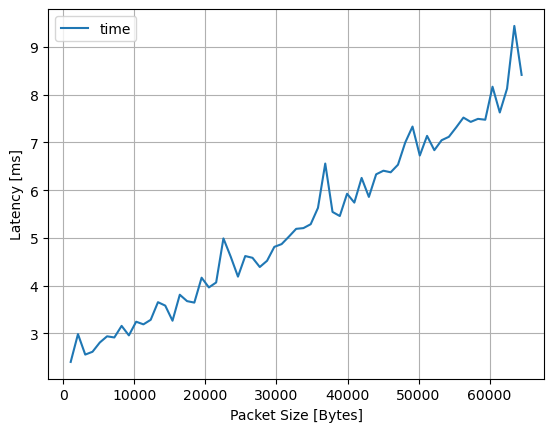

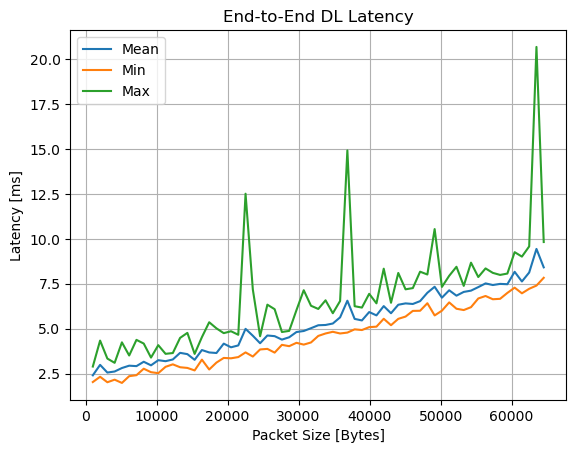

In [4]:
df = pd.read_csv("end-2-end_large.csv")
df["time"] = df["time"] * 1000

df.groupby("size").mean().plot(legend=True)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()

dg = df.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End DL Latency")
plt.savefig("dl-large-packets-end-to-end-latency.png")
plt.show()

# Downlink Max Mcs 5

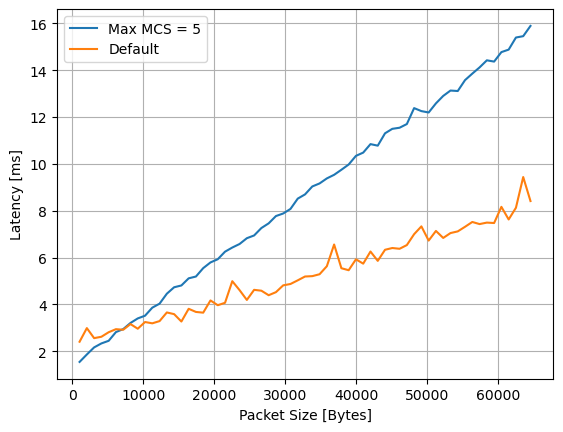

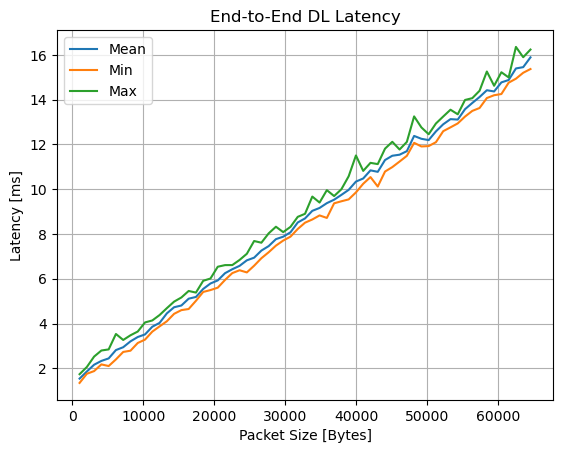

In [5]:
df2 = pd.read_csv("downlink_5_max_mcs.csv")
df2 = df2.drop(["count"], axis=1)
df2["time"] = df2["time"] * 1000
df2 = df2[df2["time"] < 29]

ax = df2.groupby("size").mean().plot(legend=False)
df.groupby("size").mean().plot(ax=ax,legend=False)
plt.legend(["Max MCS = 5", "Default"])
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()

dg = df2.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End DL Latency")
plt.savefig("dl-max_mcs_5.png")
plt.show()

# Uplink - Large Packets - Test 1

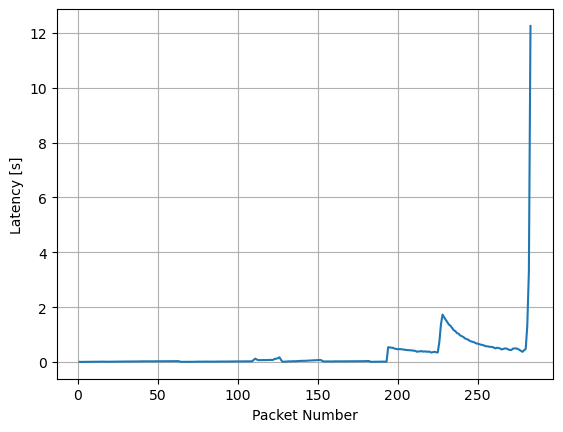

In [20]:
df = pd.read_csv("uplink-test-1.csv")
#df = df[df["count"] < 110]
#df = df.drop(["count"], axis=1)
df["time"] = df["time"]

df.plot(x="count", y="time", legend=False)
plt.grid()
plt.ylabel("Latency [s]")
plt.xlabel("Packet Number")
plt.savefig("failed_ul_test_1.png")
plt.show()

# Uplink - Large Packets - Test 2

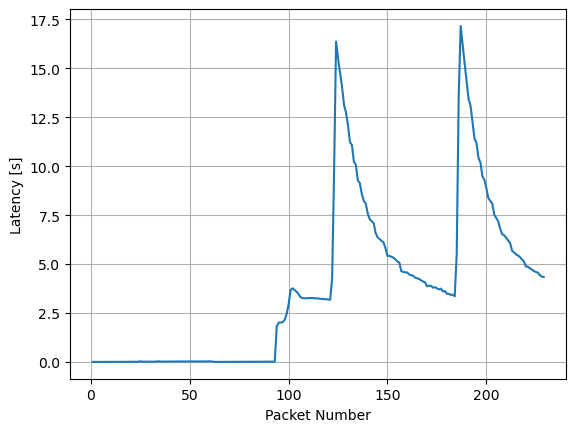

In [18]:
df = pd.read_csv("uplink-test-2.csv")
#df = df[df["count"] < 94]
#df = df.drop(["count"], axis=1)
df["time"] = df["time"]

df.plot(x="count", y="time", legend=False)
plt.grid()
plt.ylabel("Latency [s]")
plt.xlabel("Packet Number")
plt.savefig("failed_ul_test_2.png")
plt.show()

# Uplink - Large Packets - Test 1 and 2 Merged
Good part up until weird gNB behavior is merged from the 2 tests.

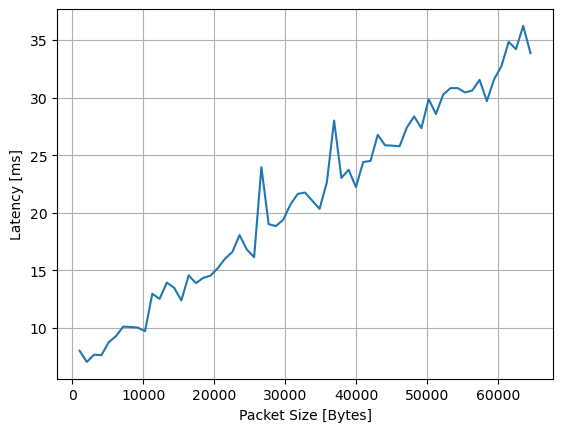

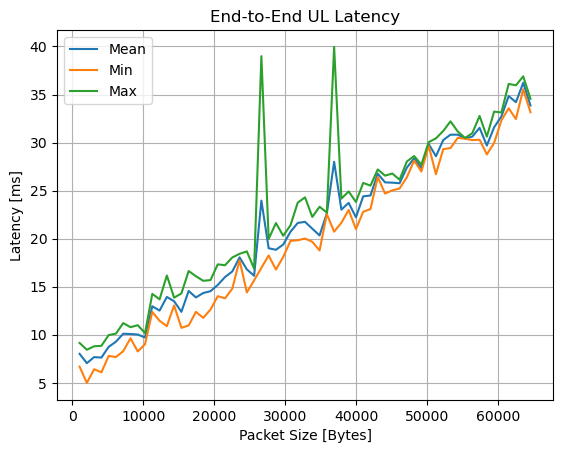

time                                                                   \
      count       mean       std        min        25%        50%        75%   
size                                                                           
1024    4.0   8.017838  1.024882   6.687641   7.603884   8.118629   8.532584   
2048    4.0   7.043660  1.483213   4.989386   6.533623   7.371545   7.881582   
3072    4.0   7.674873  0.991687   6.412029   7.266223   7.742047   8.150697   
4096    4.0   7.627130  1.210287   6.092072   6.986678   7.784486   8.424938   
5120    4.0   8.742988  0.938461   7.798195   8.161008   8.602023   9.184003   
...     ...        ...       ...        ...        ...        ...        ...   
60416   2.0  32.718897  0.579603  32.309055  32.513976  32.718897  32.923818   
61440   2.0  34.834146  1.793770  33.565760  34.199953  34.834146  35.468340   
62464   2.0  34.203410  2.484810  32.446384  33.324897  34.203410  35.081923   
63488   2.0  36.220312  0.948136  35.549879  35.885096  36.220312  36.555529   
64512   2.0  33.855319  0.989777  33.155441  33.505380  33.855319  34.205258   

                  
             max  
size              
1024    9.146452  
2048    8.442163  
3072    8.803368  
4096    8.847475  
5120    9.969711  
...          ...  
60416  33.128738  
61440  36.102533  
62464  35.960436  
63488  36.890745  
64512  34.555197  

[63 rows x 8 columns]

In [8]:
df = pd.read_csv("uplink-test-1.csv")
df = df[df["count"] < 110]
df = df.drop(["count"], axis=1)
df["time"] = df["time"] * 1000

df2 = pd.read_csv("uplink-test-2.csv")
df2 = df2[df2["count"] < 94]
df2 = df2.drop(["count"], axis=1)
df2["time"] = df2["time"] * 1000

df_merged = pd.concat([df, df2], ignore_index=True)

df_merged.groupby("size").mean().plot(legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()


dg = df_merged.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End UL Latency")
plt.savefig("ul-large-packets-end-to-end-latency-merged.png")
plt.show()

df_merged.groupby("size").describe()

# Uplink - Small Packets

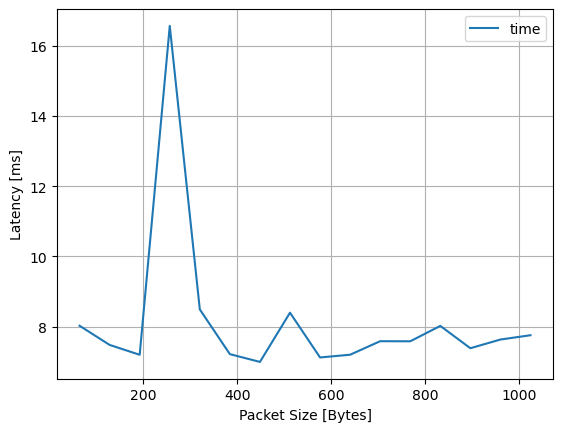

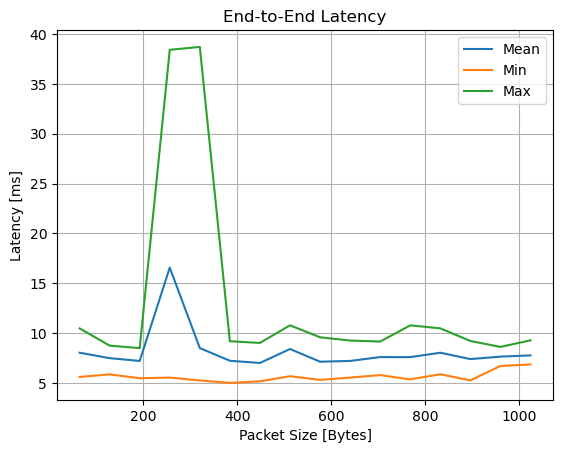

In [9]:
df = pd.read_csv("uplink-test-3-small.csv")
df = df.drop(["count"], axis=1)
df["time"] = df["time"] * 1000

df.groupby("size").mean().plot(legend=True)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()

dg = df.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End Latency")
plt.savefig("ul-small-packets-end-to-end-latency.png")
plt.show()